In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
df = pd.read_csv("abalone.csv")

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


(4177,)


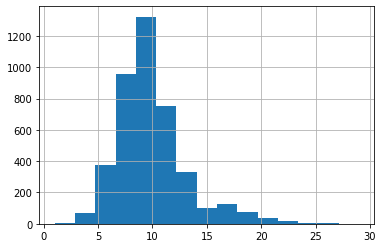

In [21]:
Y = df.Rings.to_numpy()

print(Y.shape)

df["Rings"].hist(bins=15)
plt.show()

In [22]:
X = df.drop("Rings", 1)
X = pd.get_dummies(X, columns=['Sex'])
X = X.to_numpy()
X.shape

C:\Users\M.Najafi\AppData\Local\Temp\ipykernel_17972\2118920757.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Rings", 1)


(4177, 10)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
accuracy_answers = []
for i in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_answers.append(accuracy)
accuracy_answers

[0.1937799043062201,
 0.23086124401913877,
 0.23086124401913877,
 0.23444976076555024,
 0.2619617224880383,
 0.25717703349282295,
 0.2511961722488038,
 0.25717703349282295]

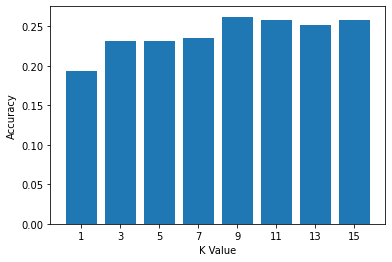

In [25]:
axis_x = [str(i) for i in range(1, 16, 2)]
plt.bar(x=axis_x, height=accuracy_answers)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()